In [2]:
from stable_baselines3.sac.policies import MlpPolicy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import SAC
import logging
import gym
import numpy as np
import os
import matplotlib.pyplot as plt
import DyMat

# add reference libraries here. Current structure will use the relative path from this file
libs = ["../../../OpenIPSL-1.5.0/OpenIPSL/package.mo",
       "../../../OpenIPSL-1.5.0/ApplicationExamples/IEEE9/package.mo"]

# check that all the paths to library package.mo files exist
# DymolaInterface() also checks this but I've found this warning helpful
for lib in libs:
    if not os.path.isfile(lib):
        print(f"Cannot find the library {lib}")

mo_name = "IEEE9.IEEE_9_RL" # name of Modelica model in the Library.Model format
env_entry_point = 'examples:IEEE9Env' # Python package location of RL environment

time_step = 60 # time delta in seconds
positive_reward = 1
negative_reward = -100 # penalize RL agent for is_done
log_level = 0
default_action = [0,0]

# these config values are passed to the model specific environment class
# mo_name and libs are passed on to the DymolaBaseEnv class
config = {
    'mo_name': mo_name,
    'libs': libs,
    'time_step': time_step,
    'positive_reward': positive_reward,
    'negative_reward': negative_reward,
    'log_level': log_level,
    'default_action': default_action,
    'method':'Dassl'
}

# enable the model specific class as an OpenAI gym environment
from gym.envs.registration import register
env_name = "MicrogridEnv-v1"

register(
    id=env_name,
    entry_point=env_entry_point,
    kwargs=config
)

In [ ]:
def train_model(env, model_name):
    model = SAC(MlpPolicy, env, learning_rate=10**-5, ent_coef='auto_0.1', verbose=1, tensorboard_log='tensorboard_log', batch_size=64)

    env.reset()
    for _ in range(10):
        print("this", os.getcwd())
        model.learn(1, reset_num_timesteps=False)
        model.save(model_name)
    return

In [ ]:
# create the environment. this will run an initial step and must return [True, [...]] or something is broken
# TODO: create error handling/warnings if simulations don't work (i.e. returns [False], [...])
env = gym.make(env_name)
model_name='test'

In [ ]:
env.reset_dymola()

In [ ]:
env.get_state_values()

In [ ]:
train_model(env, model_name)

In [ ]:
env.dymola.importInitialResult('dsres.mat',atTime=env.start)

In [ ]:
env.dymola.simulateExtendedModel(env.model_name, startTime=env.start,
                                        stopTime=env.stop,
                                        initialNames=env.model_input_names + env.rbc_action_names,
                                        initialValues = env.act,
                                        finalNames=env.model_output_names)

In [ ]:
env.dymola.getLastErrorLog()

In [ ]:
env.reset()

In [ ]:
env.start += 60
env.stop += 60

In [ ]:
#env.reset()
for i in range(3):
    action = env.action_space.sample()
    env.step(action)


In [ ]:
for i in range(1,10):
    plt.plot(env.debug_data['iEEE_9.my_time'],env.debug_data[f'iEEE_9.B{i}.V'])

In [ ]:
plt.plot(env.debug_data['iEEE_9.my_time'], env.debug_data['iEEE_9.load_B8.P'])
plt.plot(env.debug_data['iEEE_9.my_time'], env.debug_data['iEEE_9.load_B5.P'])
plt.plot(env.debug_data['iEEE_9.my_time'], env.debug_data['iEEE_9.load_B6.P'])

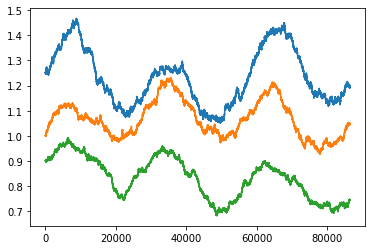

In [32]:

for _ in range(1):
#     np.random.seed(0)
    x = [[],[],[]]
    y = [[0],[0],[0]]
    start = -60
    end = 0
    for i in range(24*60):
        for j in range(3):
        
            start += 60
            end += 60
            y[j] = y[j][-1] + np.cumsum(np.random.uniform(-0.001,0.001, 60))
            x[j] += (1+0.1*np.sin(np.linspace(start*6.28/(24*60*60),end*6.28/(24*60*60), 60)) + y[j]).tolist()
    plt.plot(np.multiply(1.25,x[0]))
    plt.plot(x[1])
    plt.plot(np.multiply(0.9,x[2]))


In [23]:
class Tester:
    def __init__(self):
        np.random.seed(0)
        self.x = np.random.uniform(-1,1)

a = Tester()
b = Tester()

In [24]:
a.x, b.x

(0.0976270078546495, 0.0976270078546495)